In [1]:
import benchmark_functions as bf
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')
plt.rcParams["text.usetex"] = True
np.random.seed(14159)

# BigGAN images

## Initialisation

In [2]:
folder, classes = 'data/', ['collie', 'tabby']
k, X, y = bf.BigGAN_images(folder, classes) # load data
M = 1000000 # memory
c_err = np.zeros(5) # classification error

100%|██████████| 20000/20000 [00:46<00:00, 429.48it/s]


## Computations

### Offline

In [3]:
# Kernel Spectral Clustering (KSC)
c_err[0] = bf.offline(k, X, y)

In [4]:
# Sketching
# c_err[1] = bf.sketching(k, 10*k*X.shape[1]*(X.shape[1]+1), X, y, verbose=True, n_repetitions=1) # /!\ very memory-demanding

### Limited memory

n = 622
L = 212


100%|██████████| 20000/20000 [53:42<00:00,  6.21it/s] 


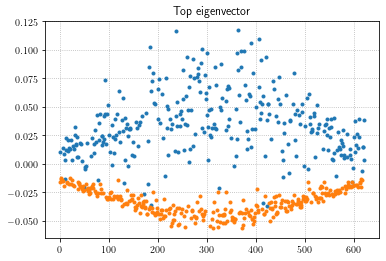

In [5]:
# Online Kernel Spectral Clustering (Online KSC)
c_err[2] = bf.streaming(k, M, X, y, verbose=True)

In [6]:
# Batch Kernel Spectral Clustering (Batch KSC)
c_err[3] = bf.batch(k, M, X, y, verbose=True)

L' = 231


100%|██████████| 87/87 [00:00<00:00, 134.09it/s]


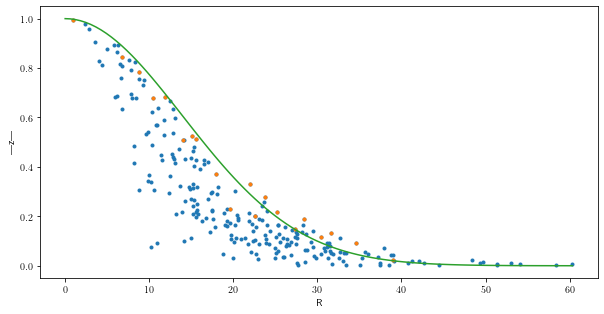

Computing sketch... Done.
Fitting k-means... Done.


In [7]:
# Sketching
c_err[4] = bf.sketching(k, M, X, y, verbose=True)

## Results

In [8]:
print("# Offline")
print("KSC        \t {:.5%}".format(c_err[0]))
# print("Sketching  \t {:.5%}".format(c_err[1]))
print("# Limited memory")
print("Online KSC \t {:.5%}".format(c_err[2]))
print("Batch KSC  \t {:.5%}".format(c_err[3]))
print("Sketching  \t {:.5%}".format(c_err[4]))

# Offline
KSC        	 4.07000%
# Limited memory
Online KSC 	 4.09000%
Batch KSC  	 4.07500%
Sketching  	 36.13500%


# BigGAN images + noise

## Initialisation

In [9]:
noise_level = 70
X += noise_level*np.random.randn(*X.shape) # add noise
c_err = np.zeros(5) # classification error

## Computations

### Offline

In [10]:
# Kernel Spectral Clustering (KSC)
c_err[0] = bf.offline(k, X, y)

In [11]:
# Sketching
# c_err[1] = bf.sketching(k, 10*k*X.shape[1]*(X.shape[1]+1), X, y, verbose=True, n_repetitions=1) # /!\ very memory-demanding

### Limited memory

n = 622
L = 212


100%|██████████| 20000/20000 [59:18<00:00,  5.62it/s] 


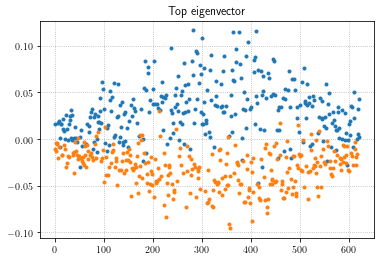

In [12]:
# Online Kernel Spectral Clustering (Online KSC)
c_err[2] = bf.streaming(k, M, X, y, verbose=True)

In [13]:
# Batch Kernel Spectral Clustering (Batch KSC)
c_err[3] = bf.batch(k, M, X, y, verbose=True)

L' = 231


100%|██████████| 87/87 [00:00<00:00, 106.71it/s]


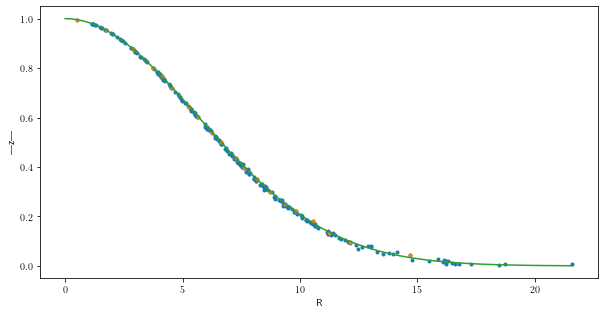

Computing sketch... Done.
Fitting k-means... Done.


In [14]:
# Sketching
c_err[4] = bf.sketching(k, M, X, y, verbose=True)

## Results

In [15]:
print("# Offline")
print("KSC        \t {:.5%}".format(c_err[0]))
# print("Sketching  \t {:.5%}".format(c_err[1]))
print("# Limited memory")
print("Online KSC \t {:.5%}".format(c_err[2]))
print("Batch KSC  \t {:.5%}".format(c_err[3]))
print("Sketching  \t {:.5%}".format(c_err[4]))

# Offline
KSC        	 5.36500%
# Limited memory
Online KSC 	 8.16500%
Batch KSC  	 10.79500%
Sketching  	 49.96500%


# Fashion-MNIST

## Initialisation

In [16]:
classes = ['Coat', 'Ankle boot']
k, X, y = bf.FashionMNIST_images(classes) # load data
M = 24000 # memory
c_err = np.zeros(5) # classification error

## Computations

### Offline

In [17]:
# Kernel Spectral Clustering (KSC)
c_err[0] = bf.offline(k, X, y)

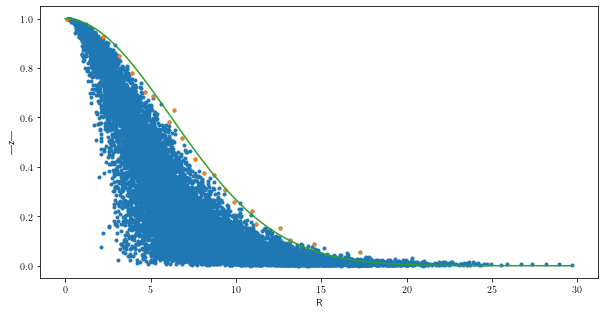

Computing sketch... Done.
Fitting k-means... Done.


In [18]:
# Sketching
c_err[1] = bf.sketching(k, 10*k*X.shape[1]*(X.shape[1]+1), X, y, verbose=True, n_repetitions=1)

### Limited memory

n = 82
L = 28


100%|██████████| 14000/14000 [01:01<00:00, 228.83it/s]


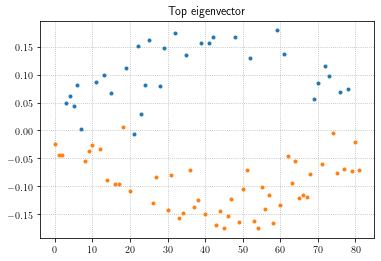

In [19]:
# Online Kernel Spectral Clustering (Online KSC)
c_err[2] = bf.streaming(k, M, X, y, verbose=True)

In [20]:
# Batch Kernel Spectral Clustering (Batch KSC)
c_err[3] = bf.batch(k, M, X, y, verbose=True)

L' = 30


100%|██████████| 467/467 [00:00<00:00, 728.64it/s]


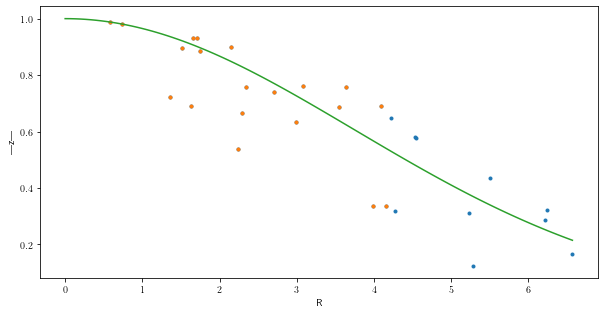

Computing sketch... Done.
Fitting k-means... Done.


In [21]:
# Sketching
c_err[4] = bf.sketching(k, M, X, y, verbose=True)

## Results

In [22]:
print("# Offline")
print("KSC        \t {:.5%}".format(c_err[0]))
print("Sketching  \t {:.5%}".format(c_err[1]))
print("# Limited memory")
print("Online KSC \t {:.5%}".format(c_err[2]))
print("Batch KSC  \t {:.5%}".format(c_err[3]))
print("Sketching  \t {:.5%}".format(c_err[4]))

# Offline
KSC        	 3.25000%
Sketching  	 3.10714%
# Limited memory
Online KSC 	 3.30714%
Batch KSC  	 3.37857%
Sketching  	 14.28571%
